In [1]:
import sympy as sp
from qbee import *

sp.init_printing()

x, y, z = sp.symbols('x, y, z')
dot_x, dot_y, dot_z = derivatives('x, y, z')


c:\python\lib\site-packages\qbee\quadratization.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Simple systems

In [2]:
system = EquationSystem([
    sp.Eq(dot_x, x**3)
])

system.equations

In [3]:
quadratize(system).system.equations

In [4]:
system = EquationSystem([
    sp.Eq(dot_x, x**3),
    sp.Eq(dot_y, x * z**2),
    sp.Eq(dot_z, z)
])

system.equations

In [5]:
quadratize(system).system.equations

# Example 6.3.5 from [article](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-217.pdf)

There are several methods to quadratic-linearize a system.

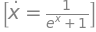

In [6]:
system = EquationSystem([
    sp.Eq(dot_x, 1 / (1 + sp.exp(x)))
])

system.equations

In [7]:
poly_system = polynomialize(system)
poly_system.equations

In [8]:
quad_result = quadratize(poly_system, search_algorithm='BFS', log_file='log.csv')
quad_result.system.equations

In [9]:
quad_result.statistics

steps: 2
Method's name: BFS
depth: 1

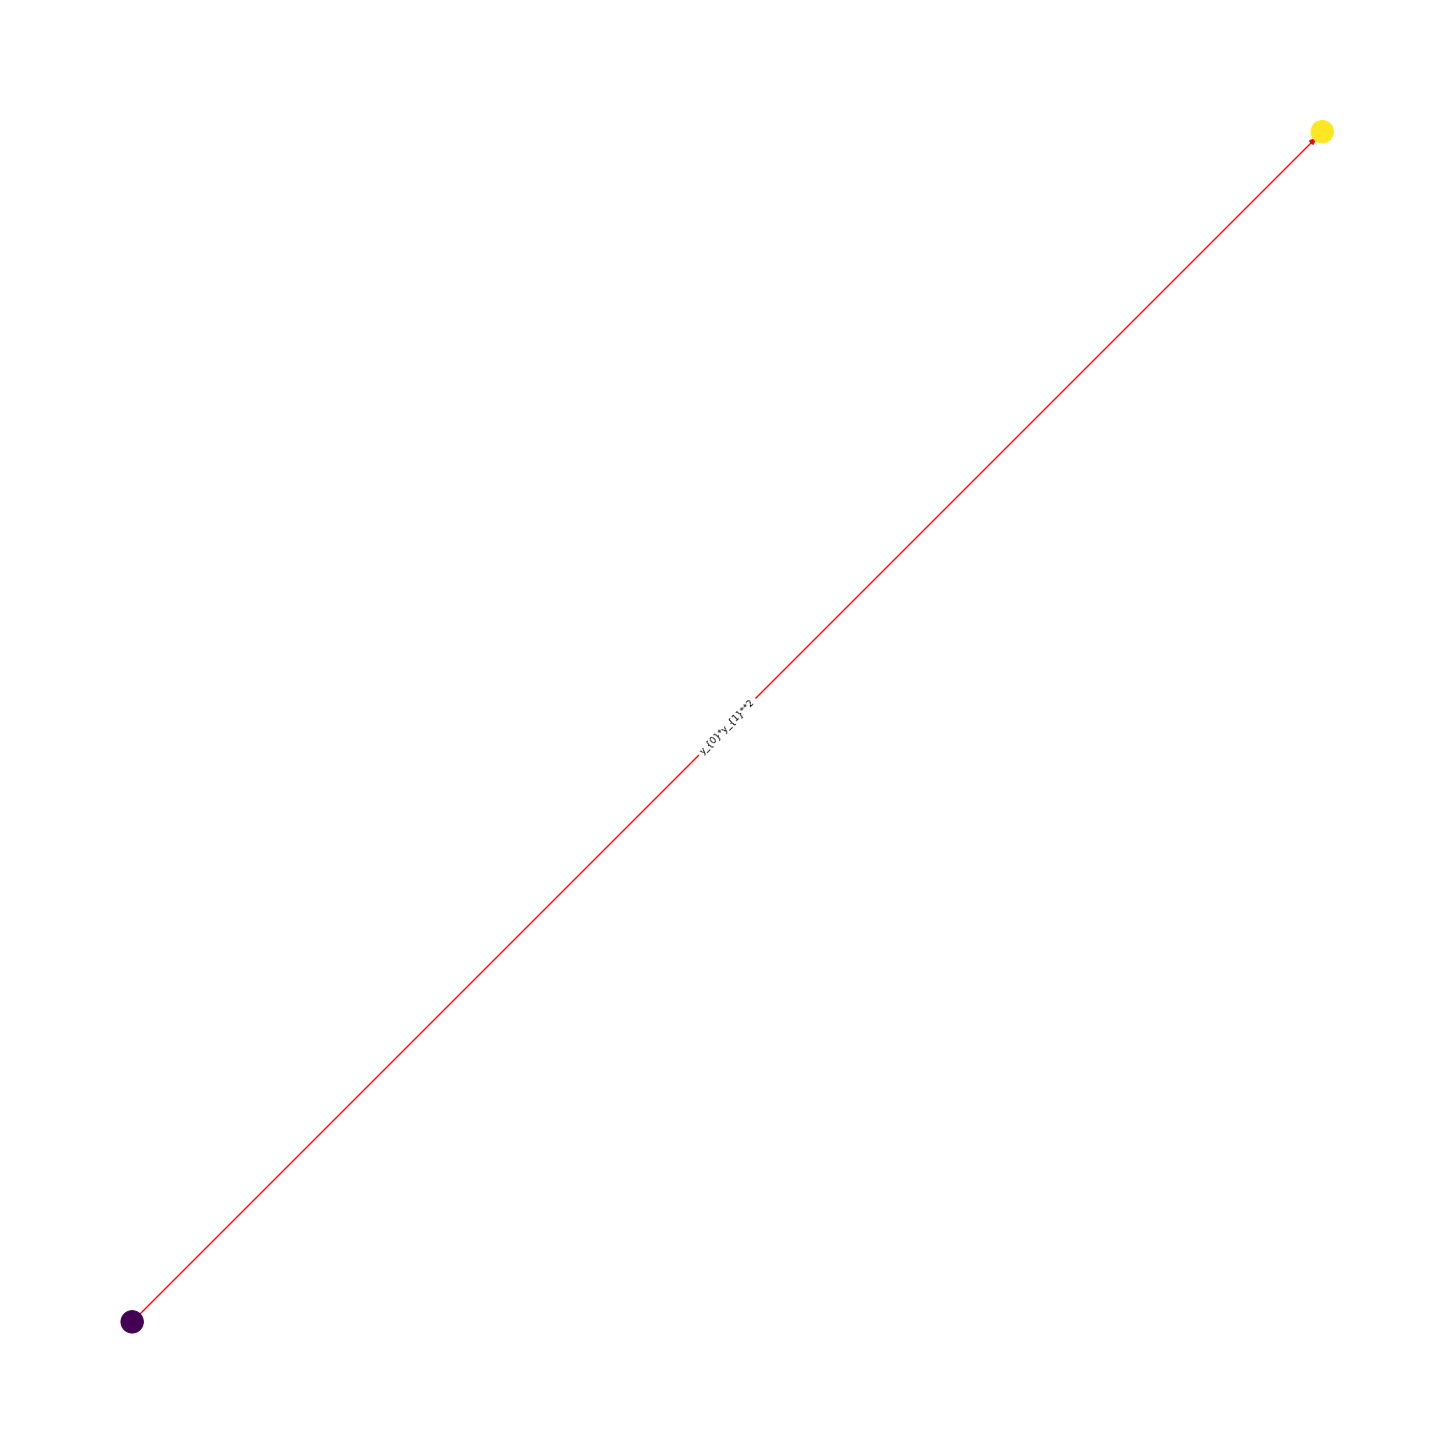

In [10]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [11]:
quad_result = quadratize(poly_system, search_algorithm="ID-DLS",  log_file='log.csv')
quad_result.system.equations

In [12]:
quad_result.statistics

steps: 2
Method's name: ID-DLS
depth: 1

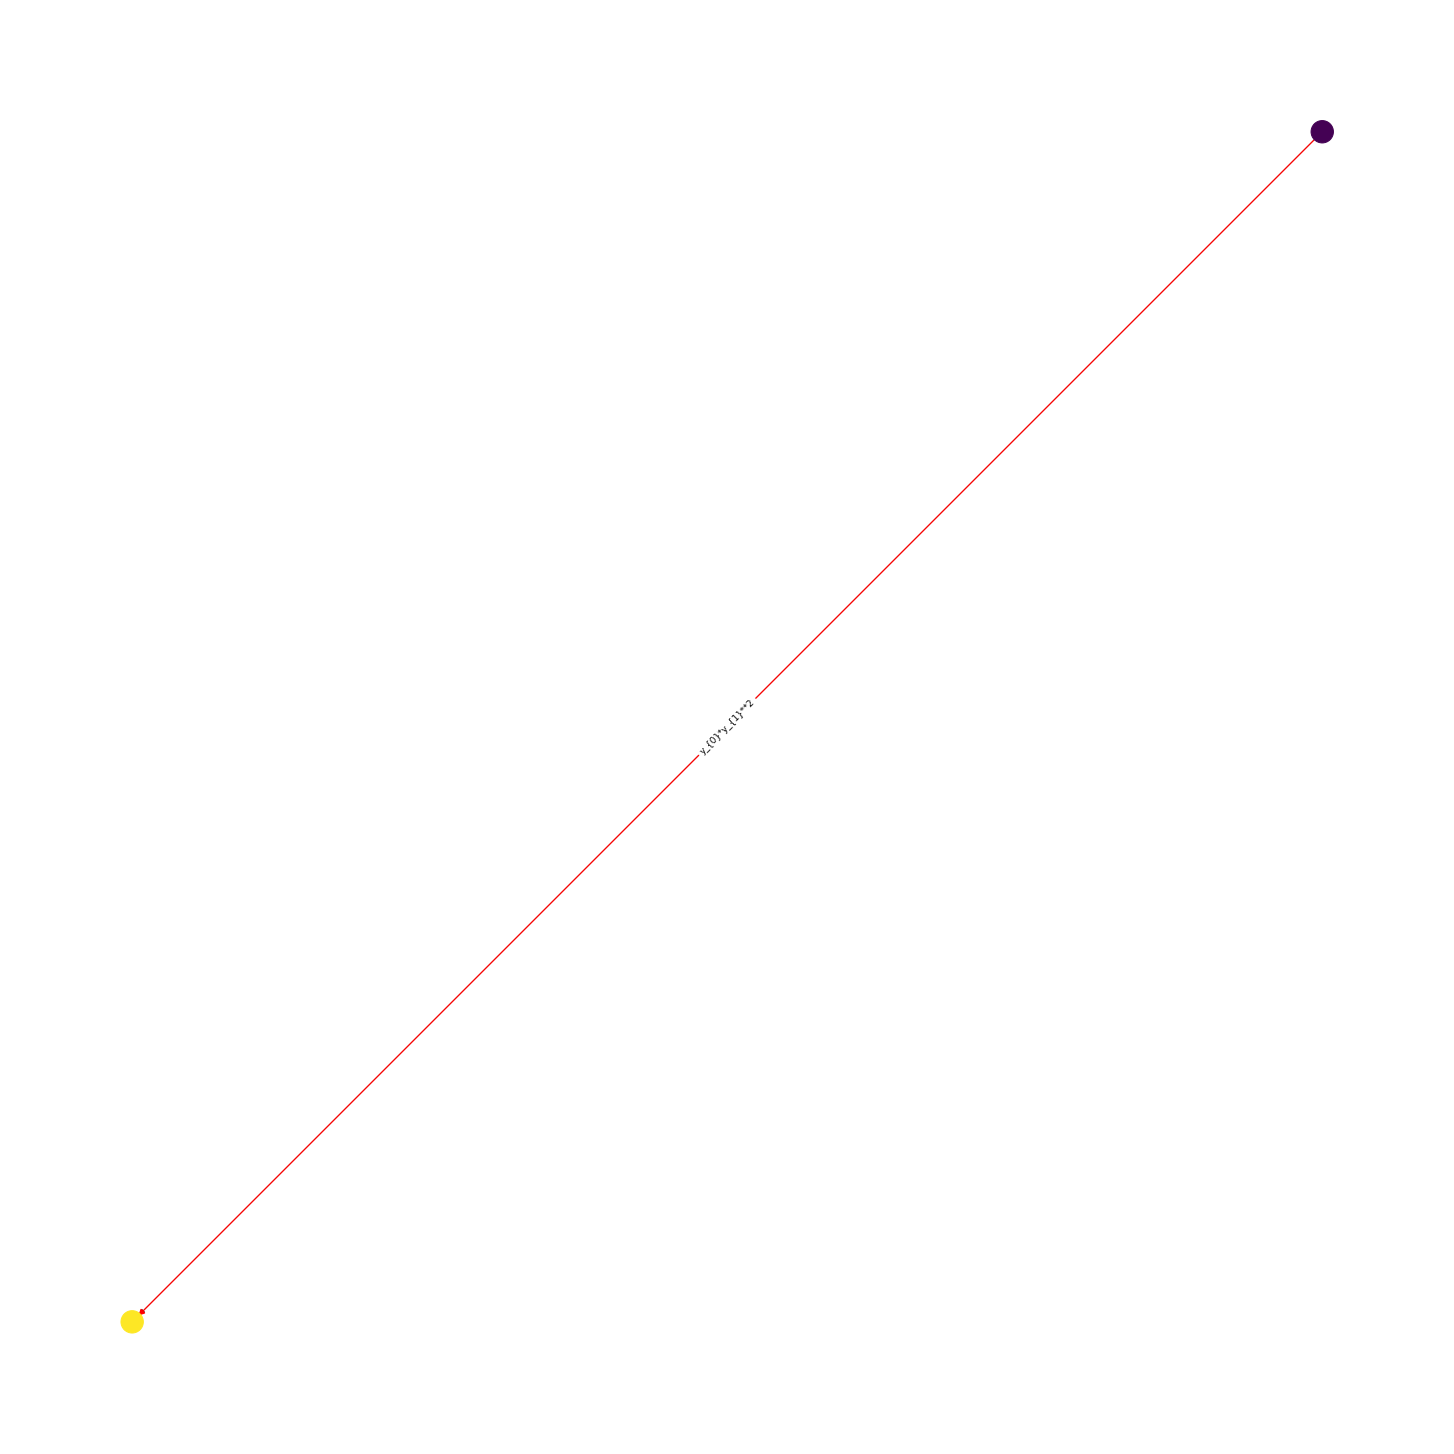

In [13]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


# $x^2y^2z^2$ Example

In [14]:
w = sp.symbols('w')
dot_w = derivatives('w')

system = EquationSystem([
    sp.Eq(dot_x, 0),
    sp.Eq(dot_y, 0),
    sp.Eq(dot_z, 0),
    sp.Eq(dot_w, x**2 * y**2 * z**2)
])

poly_system = polynomialize(system)

poly_system.equations

In [15]:
quad_result = quadratize(poly_system, search_algorithm="BFS", log_file='log.csv')
quad_result.system.equations

In [16]:
quad_result.statistics

steps: 11
Method's name: BFS
depth: 1

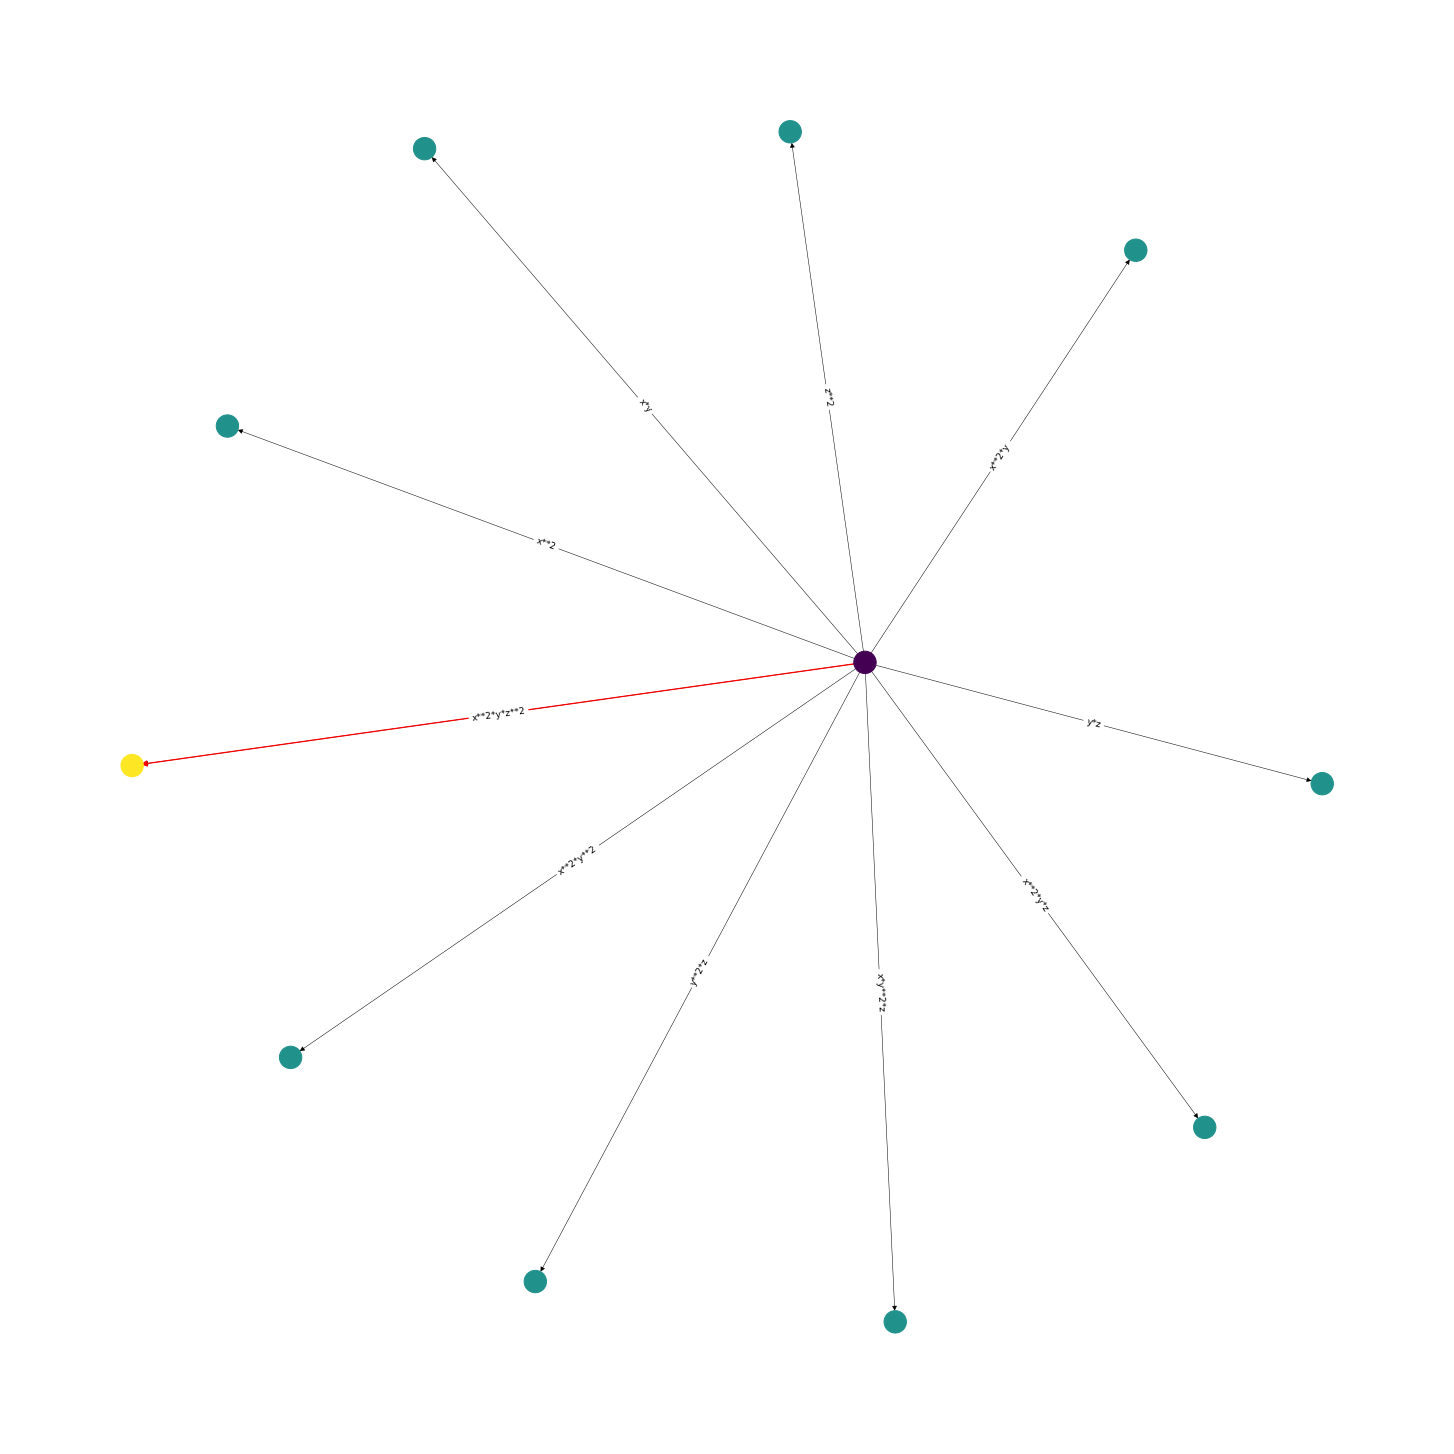

In [17]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)


In [18]:
quad_result = quadratize(poly_system, search_algorithm="ID-DLS", log_file='log.csv')
quad_result.system.equations

In [19]:
quad_result.statistics

steps: 2
Method's name: ID-DLS
depth: 1

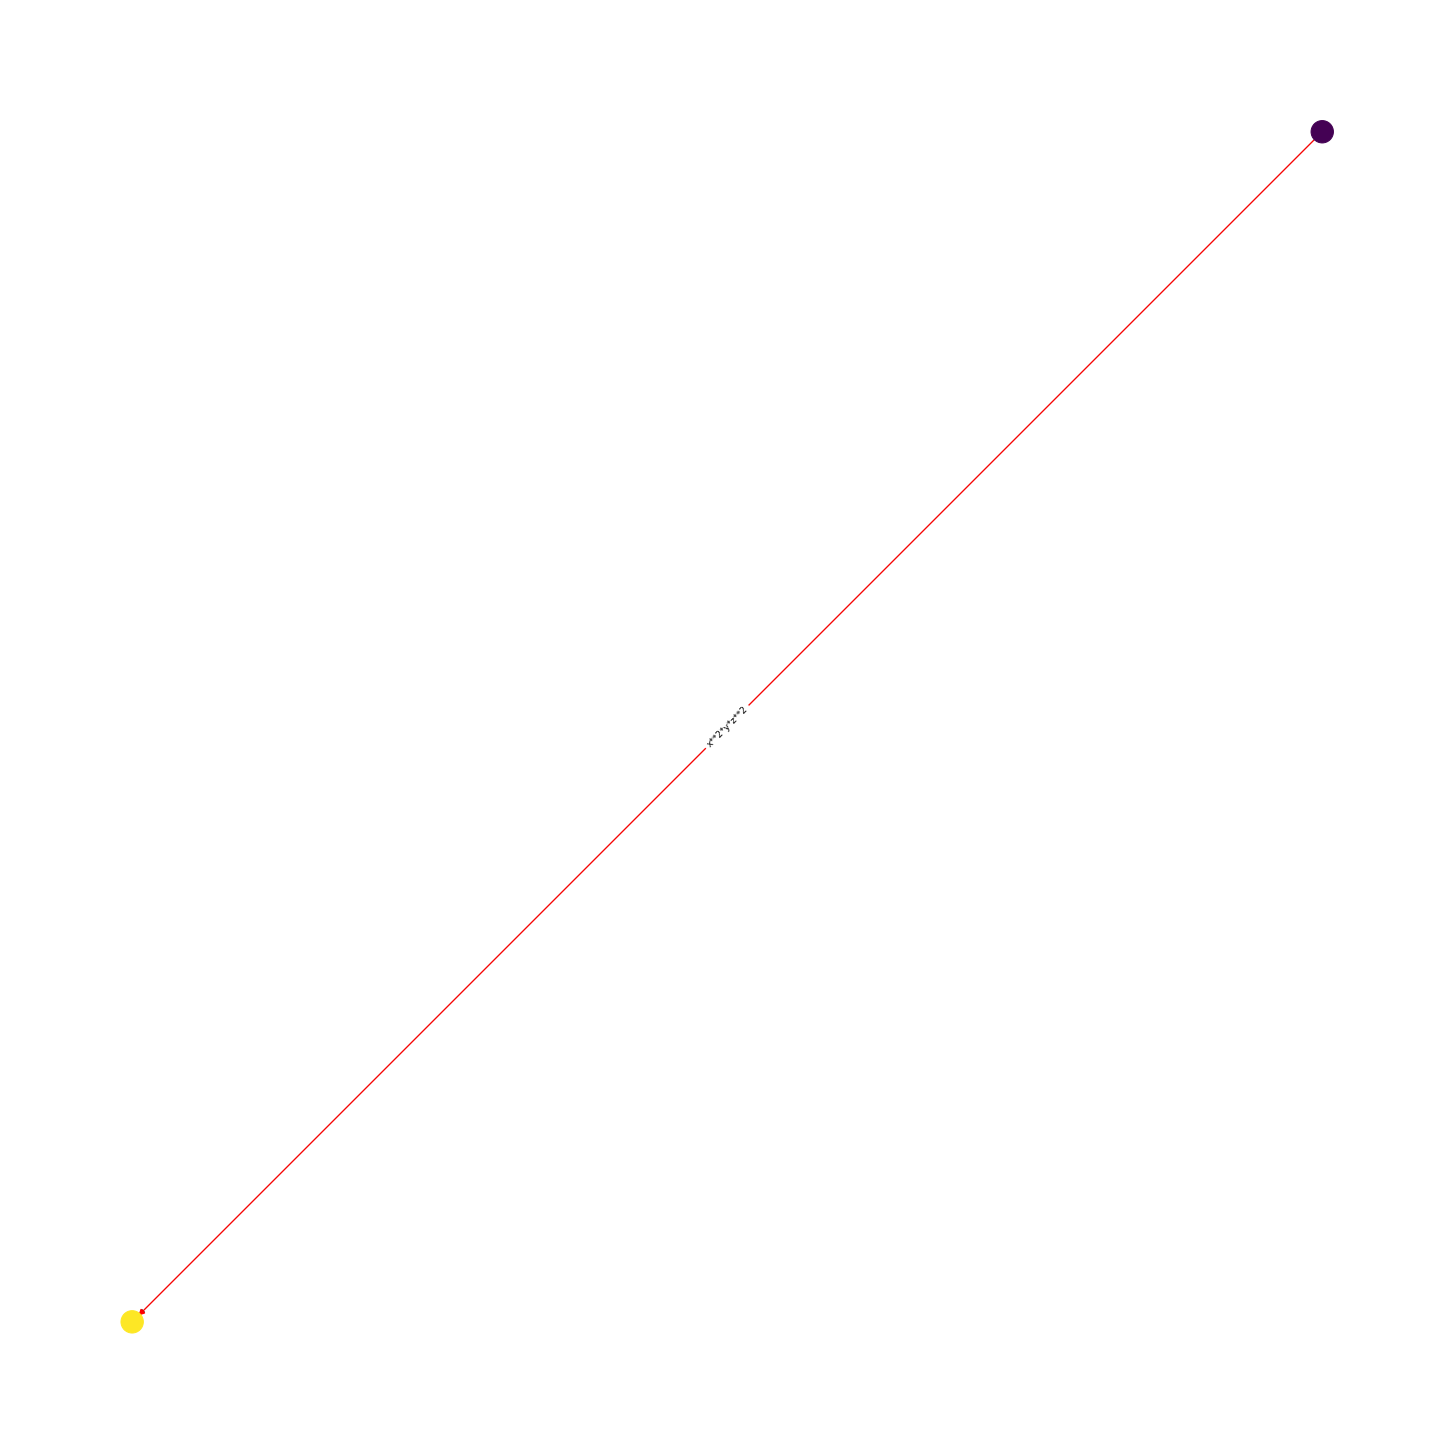

In [20]:
visualize('log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)

# Tough Example

In [21]:
system = EquationSystem([
    sp.Eq(dot_x, x / (1 + sp.exp(x)))
])

system.equations

In [22]:
poly_system = polynomialize(system)
poly_system.equations

## BFS

In [23]:
quad_result = quadratize(poly_system, search_algorithm="BFS", limit_depth=2, debug='info', log_file='log.csv')
quad_result.system.equations

In [24]:
quad_result.statistics

steps: 122
Method's name: BFS
depth: 2

## Tuned ID-DLS

In [25]:
quad_result = quadratize(poly_system, search_algorithm="ID-DLS", initial_max_depth=2, limit_depth=2, debug='info',
                         log_file='log.csv')
quad_result.system.equations

In [26]:
quad_result.statistics


steps: 50
Method's name: ID-DLS
depth: 2